# Decision Tree Regressor implementation using Diabetes Prediction model

In this Notebook, i am going to implement Decision Tree Regressor on Diabetes Datasest and build a Predictive Model.

In [1]:
## importing the dataset
from sklearn.datasets import load_diabetes

In [2]:
## loading the dataset
data = load_diabetes()

In [3]:
## description of the dataset
print(data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [7]:
## creating a DataFrame
import pandas as pd
df = pd.DataFrame(data.data, columns=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])
df['target'] = data.target

In [8]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [9]:
## selecting Dependent and Independent Features
X = df.drop('target', axis = 1)
y  = df['target']

In [10]:
## train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
## importing required module for model building
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()

In [12]:
## training the model
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [13]:
## making predictions
y_pred = dt_regressor.predict(X_test)

In [31]:
## performance metrices
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae =  mean_absolute_error(y_test, y_pred)
r2_Score = r2_score(y_test, y_pred)

## printing the results
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("r2 Score:", r2_Score)

Mean Squared Error: 5688.855855855856
Mean Absolute Error: 56.693693693693696
r2 Score: -0.028783903576311998


Generally Decision Tree Regressor Overfits on Regression Tasks. Rather than generalizing, it memorizes the data. Therefore we'll use Hyperparameter Tuning to tune the model.

### Hyperparameter Turing

In [42]:
## defining parameters
params = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 4, 6, 8, 10, ],
    'max_features': [None, 'sqrt', 'log2']
}

In [43]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=params, cv=5, scoring='neg_median_absolute_error')

In [44]:
## Fitting the mdoel
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_median_absolute_error')

In [45]:
## making predictions
y_pred_grid = grid.predict(X_test)

In [46]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [47]:
## performance of the model
mse = mean_squared_error(y_test, y_pred_grid)
mae =  mean_absolute_error(y_test, y_pred_grid)
score = r2_score(y_test, y_pred_grid)

## printing the results
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("r2 Score:", score)

Mean Squared Error: 3205.456265159015
Mean Absolute Error: 42.05862865602006
r2 Score: 0.42031897225539505


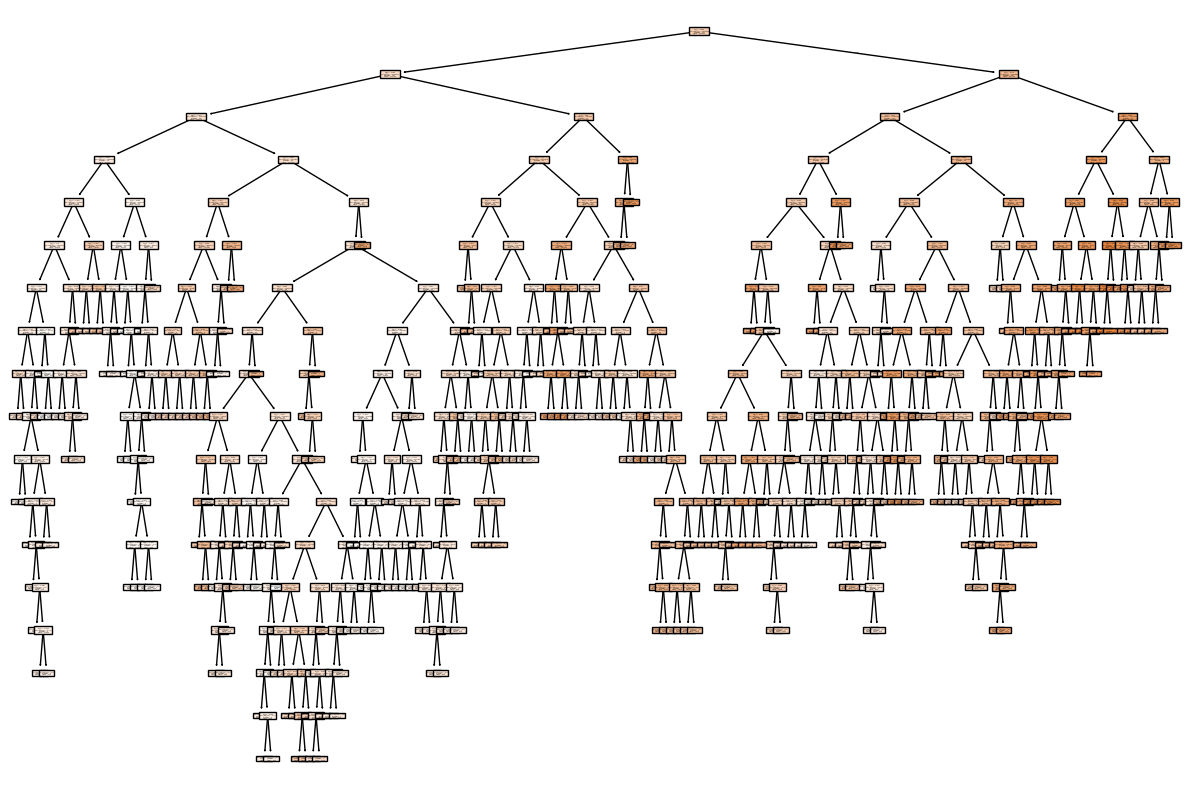

In [49]:
## visualzing the Decision Tree
import matplotlib.pyplot as plt
from sklearn import tree   

plt.figure(figsize=(15, 10))
tree.plot_tree(dt_regressor, filled = True)
plt.show()

So we have achived an accuracy of 42% from -28%. Although this was not good enough, but the main motive of this Notebook was just to show a general Decision Tree Regressor Implementation.